# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
import sap2012
import matplotlib.pyplot as plt
s=sap2012.Sap2012()

## Read input file

In [2]:
fp='input_csv_file.csv'
s.read_input_csv(fp)

## Change input and run model

The original `area` input value is:

In [3]:
s.inputs['area']

[0, 63, 63]

Here this is changed to the three possible options below:

In [4]:
areas=[[0,50,50],[0,100,100],[0,150,150]]

For each area, the SAP model is run and the results stored in the `outputs` dictionary:

In [5]:
outputs={}
for i,a in enumerate(areas):
    s.inputs['area']=a
    s.run()
    outputs['run%s' % str(i+1)]=s.outputs.copy() # needs copy otherwise the same object is placed in all dictionary items

## Plot results

In [6]:
total_floor_areas=[v['total_floor_area'] for v in outputs.values()]
total_floor_areas

[100, 200, 300]

In [7]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[6241.564840274669, 7664.121555846006, 9086.678271417346]

Text(0, 0.5, 'total_CO2_emissions_yearly')

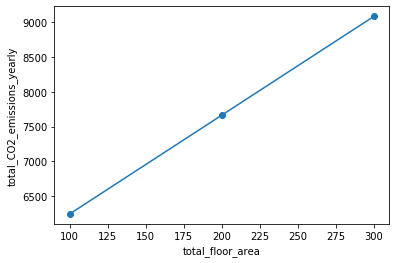

In [10]:
fig, ax = plt.subplots()  
ax.plot(total_floor_areas,total_CO2_emissions_yearlys,'-o')
ax.set_xlabel('total_floor_area')
ax.set_ylabel('total_CO2_emissions_yearly')